# Objective :

"Blood Transfusion Service Center Data Set :

Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan
This is a classification problem.."

# Step 1 :  Import Library and Dataset

In [32]:
import pandas as pd
import numpy as np

In [33]:
data = pd.read_csv(r"C:\Users\suvar\Desktop\Decision tree\transfusion.csv")
data


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [34]:
data.columns=['Recencymonths','Frequencytimes','Monetaryccblood','Timemonths','donatedbloodinMarch']
data.columns

Index(['Recencymonths', 'Frequencytimes', 'Monetaryccblood', 'Timemonths',
       'donatedbloodinMarch'],
      dtype='object')

In [35]:
data.head(5)

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Recencymonths        748 non-null    int64
 1   Frequencytimes       748 non-null    int64
 2   Monetaryccblood      748 non-null    int64
 3   Timemonths           748 non-null    int64
 4   donatedbloodinMarch  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [37]:
data.describe()

,Recencymonths,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


### Removing Irrelavent Variable

In [38]:
data= data.drop(['Recencymonths'],axis=1)
data.columns

Index(['Frequencytimes', 'Monetaryccblood', 'Timemonths',
       'donatedbloodinMarch'],
      dtype='object')

In [40]:
#Replacing spaces with null values in total charges column
data['Frequencytimes'] =data["Frequencytimes"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Frequencytimes       748 non-null    float64
 1   Monetaryccblood      748 non-null    int64  
 2   Timemonths           748 non-null    int64  
 3   donatedbloodinMarch  748 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 23.5 KB


### Checking Missing Value

In [43]:
data.isna().sum()

Frequencytimes         0
Monetaryccblood        0
Timemonths             0
donatedbloodinMarch    0
dtype: int64

In [44]:
data.describe() # describe works for number by default 

,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
count,748.000000,748.000000,748.000000,748.000000
mean,5.514706,1378.676471,34.282086,0.237968
std,5.839307,1459.826781,24.376714,0.426124
min,1.000000,250.000000,2.000000,0.000000
25%,2.000000,500.000000,16.000000,0.000000
50%,4.000000,1000.000000,28.000000,0.000000
75%,7.000000,1750.000000,50.000000,0.000000
max,50.000000,12500.000000,98.000000,1.000000


In [45]:
data.head()

,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
0,50.0,12500,98,1
1,13.0,3250,28,1
2,16.0,4000,35,1
3,20.0,5000,45,1
4,24.0,6000,77,0


In [47]:
data.donatedbloodinMarch.value_counts(ascending=False)

0    570
1    178
Name: donatedbloodinMarch, dtype: int64

In [48]:
570+178

748

In [52]:
data.donatedbloodinMarch=data.donatedbloodinMarch.replace({'donated blood in March' : 'yes'})

In [50]:
data.donatedbloodinMarch.value_counts()

0    570
1    178
Name: donatedbloodinMarch, dtype: int64

In [ ]:
employee.OnlineBackup=employee.OnlineBackup.replace({'No internet service' : 'No'})
employee.DeviceProtection=employee.DeviceProtection.replace({'No internet service' : 'No'})
employee.TechSupport=employee.TechSupport.replace({'No internet service' : 'No'})
employee.StreamingTV=employee.StreamingTV.replace({'No internet service' : 'No'})
employee.StreamingMovies=employee.StreamingMovies.replace({'No internet service' : 'No'})
employee.MultipleLines=employee.MultipleLines.replace({'No phone service' : 'No'})

# Churn Rate Analysis

In [65]:
import plotly.express as px

fig = px.pie(data,names='donatedbloodinMarch',color='donatedbloodinMarch',
             color_discrete_map={'0':'red',
                                 '1':'green'})
fig.show()

# Trend Analysis


In [66]:
data.donatedbloodinMarch.value_counts()

0    570
1    178
Name: donatedbloodinMarch, dtype: int64

In [67]:
170/748

0.22727272727272727

In [71]:
Blood_denote= data[data["donatedbloodinMarch"] == 1]
Blood_denote

,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
0,50.0,12500,98,1
1,13.0,3250,28,1
2,16.0,4000,35,1
3,20.0,5000,45,1
6,7.0,1750,14,1
...,...,...,...,...
680,14.0,3500,69,1
695,7.0,1750,58,1
708,2.0,500,38,1
712,2.0,500,35,1


In [72]:
fig = px.sunburst(Blood_denote, path=["Frequencytimes","Monetaryccblood","Timemonths"])
fig.show()

C:\Users\suvar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\suvar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\suvar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#### Conclusion :- Customer Trend Analysis 

* Whether he/she donated blood in March 2007 

* Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan
   This is a classification problem.

### Taking subset data of Number 

In [73]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Frequencytimes', 'Monetaryccblood', 'Timemonths', 'donatedbloodinMarch']

In [74]:
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
0,50.0,12500,98,1
1,13.0,3250,28,1
2,16.0,4000,35,1


### Combine to Dataset

In [85]:
data_combined = pd.concat([data_num, data_dummies],axis=1)

In [87]:
data_combined.head()

,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
0,50.0,12500,98,1
1,13.0,3250,28,1
2,16.0,4000,35,1
3,20.0,5000,45,1
4,24.0,6000,77,0


# Step 3: Data Partition

In [88]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = data_combined.drop(['donatedbloodinMarch'],axis=1)
y = data_combined[['donatedbloodinMarch']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [89]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [90]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,donatedbloodinMarch,Frequencytimes,Monetaryccblood,Timemonths
565,0,9.0,2250,75
334,0,2.0,500,16
574,1,2.0,500,11
499,0,1.0,250,74
397,0,3.0,750,26


In [91]:
independent_variable = list(train.columns[1:])
independent_variable

['Frequencytimes', 'Monetaryccblood', 'Timemonths']

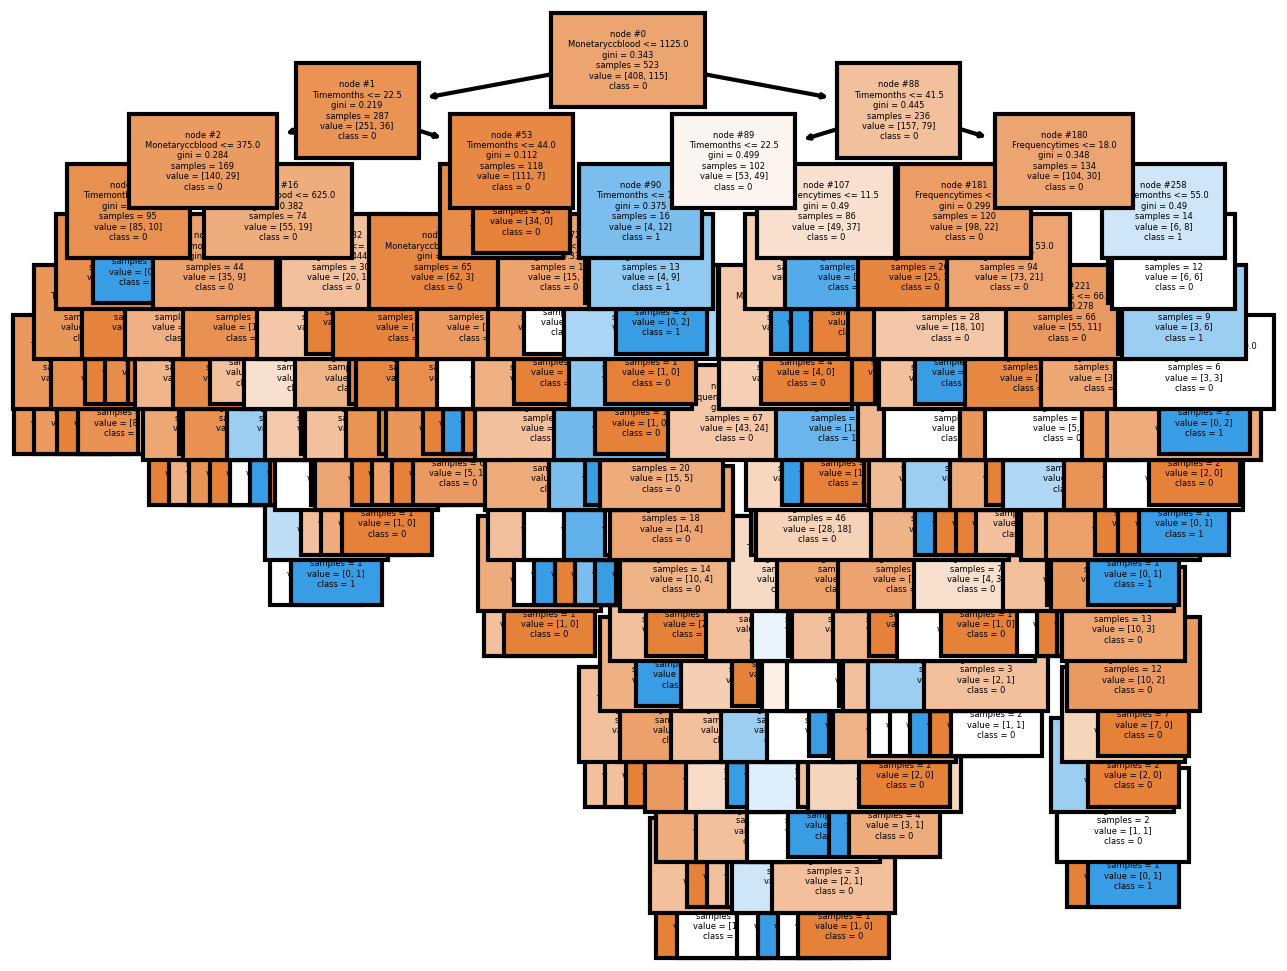

In [93]:
from sklearn import tree
import matplotlib.pyplot as plt

donatedbloodinMarch=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=donatedbloodinMarch, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Step 6 : Predictions on Train Dataset

In [94]:
train.head()

,donatedbloodinMarch,Frequencytimes,Monetaryccblood,Timemonths
565,0,9.0,2250,75
334,0,2.0,500,16
574,1,2.0,500,11
499,0,1.0,250,74
397,0,3.0,750,26


In [95]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,donatedbloodinMarch,Frequencytimes,Monetaryccblood,Timemonths,Predicted
565,0,9.0,2250,75,0
334,0,2.0,500,16,0
574,1,2.0,500,11,0
499,0,1.0,250,74,0
397,0,3.0,750,26,0


# Step 7 : Model Performance Metrics

In [96]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['donatedbloodinMarch'])
print(matrix)

[[406  52]
 [  2  63]]


#### Final accuracy of Model Before Pruning 

In [97]:
Accuracy_Train=((406+63)/(523)*100)
print(Accuracy_Train)   # overfit or High accuracy

89.67495219885278


In [98]:
from sklearn.metrics import classification_report
print(classification_report(train['donatedbloodinMarch'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       408
           1       0.97      0.55      0.70       115

    accuracy                           0.90       523
   macro avg       0.93      0.77      0.82       523
weighted avg       0.90      0.90      0.89       523



### Model Improvement by Pruning Method ( Cut Tree)

In [99]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

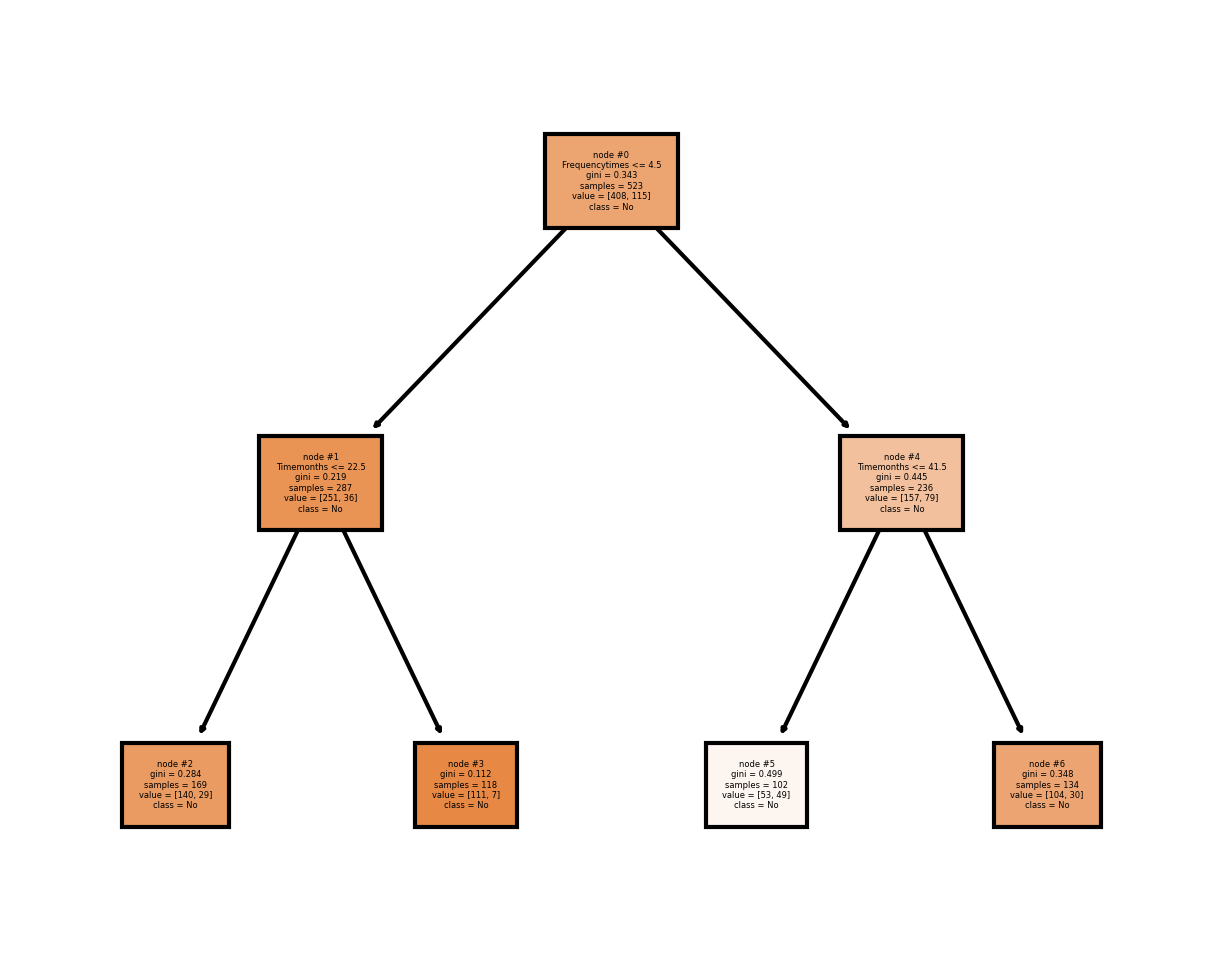

In [100]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [101]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,donatedbloodinMarch,Frequencytimes,Monetaryccblood,Timemonths,Predicted
565,0,9.0,2250,75,0
334,0,2.0,500,16,0
574,1,2.0,500,11,0
499,0,1.0,250,74,0
397,0,3.0,750,26,0


#### Final accuracy of Model after Pruning 

In [102]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['donatedbloodinMarch'])
print(matrix)

[[408 115]
 [  0   0]]


In [103]:
Accuracy_Train=((408+0)/(523)*100)
print(Accuracy_Train)

78.0114722753346


In [104]:
from sklearn.metrics import classification_report
print(classification_report(train['donatedbloodinMarch'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       408
           1       0.00      0.00      0.00       115

    accuracy                           0.78       523
   macro avg       0.39      0.50      0.44       523
weighted avg       0.61      0.78      0.68       523



C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Step 8 : Predictions on Test Dataset


In [105]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch
344,1.0,250,11,0
268,7.0,1750,82,0
586,1.0,250,2,1
513,14.0,3500,35,0
270,11.0,2750,40,0


In [106]:
test['Predicted']=dt.predict(X_test)
test.head()

,Frequencytimes,Monetaryccblood,Timemonths,donatedbloodinMarch,Predicted
344,1.0,250,11,0,0
268,7.0,1750,82,0,0
586,1.0,250,2,1,0
513,14.0,3500,35,0,0
270,11.0,2750,40,0,0


# Step 9 : Model Performance Metrics on Test data 

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['donatedbloodinMarch'])
print(confusion_matrix)

[[162  63]
 [  0   0]]


In [108]:
Accuracy_test=((162+0)/(225)*100)
Accuracy_test

72.0

# Sensitivity & Specificity

#### Train

In [115]:
from sklearn.metrics import classification_report
print(classification_report(train['donatedbloodinMarch'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       408
           1       0.00      0.00      0.00       115

    accuracy                           0.78       523
   macro avg       0.39      0.50      0.44       523
weighted avg       0.61      0.78      0.68       523



C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Test


In [111]:
from sklearn.metrics import classification_report
print(classification_report(test['donatedbloodinMarch'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       162
           1       0.00      0.00      0.00        63

    accuracy                           0.72       225
   macro avg       0.36      0.50      0.42       225
weighted avg       0.52      0.72      0.60       225



C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\suvar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



* 72% is accuracy of Good customer capture by model 

### Model Improvement by Pruning Method ( Cut Tree)

In [116]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

### After Running this go back then run from  Plotting the Graph


# Grid Search Method 

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

In [114]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=270,
                       random_state=42)